In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Cvičení 2: Podmíněnost problémů a Stabilita algoritmů

---
- [poznámky z přednášky](https://www.karlin.mff.cuni.cz/~blechta/znm/assets/uvodZNM.pdf)
- další materiály
  - kniha [Duintjer Tebbens a kolektiv: Analýza metod pro maticové výpočty](https://cuni.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma990020832750106986&context=L&vid=420CKIS_INST:UKAZ&lang=cs&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,Anal%C3%BDza%20metod%20pro%20maticov%C3%A9%20v%C3%BDpo%C4%8Dty&offset=0) (knihovna v karlíně)
  - kniha [Higham: Accuracy and Stability of Numerical Algorithms](http://ftp.demec.ufpr.br/CFD/bibliografia/Higham_2002_Accuracy%20and%20Stability%20of%20Numerical%20Algorithms.pdf) (Kapitoly 1 a 2; bible oboru)
  - kniha [Drkošová, Strakoš: Úvod do teorie citlivosti a stability v numerické lineární algebře](https://dl1.cuni.cz/pluginfile.php/905350/mod_resource/content/2/Drkosova_Strakos_skripta.pdf)
  - skripta [Foundations of Applied Mathematics](https://foundations-of-applied-mathematics.github.io/) (Volume 1, Kapitola 11)

- ***Primární úlohy*** : A1, A2, B2

- ***Úlohy k bonusové části zkoušky*** : A1, A2

- základní ***Learning outcomes*** (cviko, nikoliv přednáška)
  - Umím rozlišit *chybu* a *reziduum*.
  - Dokáži uvést různé zdroje nepřesností v numerických výpočtech.
  - Umím rozlišit pojmy *podmíněnost* a *stabilita* a demonstrovat jejich význam a rozdíl mezi nimi na jednoduchých, konkrétních příkladech.

---

## Intro

Z první přednášky si pamatujeme, že pro numerickou matematiku jsou napříč všemi tématy důležité dva koncepty

- podmíněnost matematických problémů (aka citlivost)
- stabilita numerických algoritmů (aka zpětná stabilita)

Proč jsou důležité? Jedním z hlavních důvodů je fakt, že většinu věcí, co umíme spočítat na papíře s tužkou, v reálném světě a v praktickými parametry vyřešit nezvládneme. Ve cviku 1 jsme viděli limitace počítače, pokud jde o přesnost reprezentace čísel. Možná ještě důležitějším zdrojem nepřesností je způsob získání dat, s kterými během výpočtu pracujeme (data z průzkumů, měření v terénu, data ze simulací, které jsou opět prováděné pouze s jistou přeností, lidský faktor, ...).

Tohle cviko má za úkol demonstrovat, co všechno se může na základě těchto malých nepřesností stát a jak to umíme matematicky analyzovat.

## Slovníček

Chceme se bavit o tom jask numericky řešit konkrétní matematické problémy - zjevně tedy budeme potřebovat zavést nějaký způsob měření kvality našeho numerického řešení. V praxi se používají 2 typy "kvality měření" - pro jednoduchost si je představíme na příkladu.

Předpokládejme tedy, že chceme najít řešení nějaké rovnice

$$ f(x) = b $$

pro danou funkci $f : \mathbb{R} \rightarrow \mathbb{R}$ a pravou stranu $b\in \mathbb{R}$ s řešením $x_{sol}\in \mathbb{R}$ - tj. platí $f(x_{sol}) = b$ ve smyslu *rovnosti* (nikoliv *rovnice*).

My se snažíme numericky aproximovat $x_{sol}$ - máme nějaký algoritmus, kterým spočítáme $x_{aprox}$ a douifáme, že

$$ x_{sol} \approx x_{aprox}. $$

Jak budeme měřit kvalitu $x_{aprox}$?


[***Chyba***](https://en.wikipedia.org/wiki/Residual_(numerical_analysis)#)
>  - definujeme jako $e := x_{sol} - x_{aprox}$ v nějaké vhodné normě,
>  - výhodou je, že tohle je ta kvantita, co nás "většinou zajímá"
>  - nevýhodou je, že jí v praxi většinou neumíme měřit - kdybychom měli řešení $x_{sol}$, tak ho nepotřebujeme hledat

[***Reziduum***](https://en.wikipedia.org/wiki/Residual_(numerical_analysis))
>  - definované jako $r := b - f(x_{aprox}) \equiv f(x_{sol}) - f(x_{aprox})$ v nějaké vhodné normě,
>  - výhodou je, že tohle je ta kvantita, co "umíme snadno spočítat"
>  - nevýhodou je, že v praxi může nastat
  $$ \mathrm{male \, reziduum} \quad \nRightarrow \quad \mathrm{mala \, chyba
  } $$

Úloha 0 - pochopil/a jsem to správně?

---
**Tužka a papír** : Dejme tomu, že máme soustavu lineárních algebraických rovnic $A\mathbf{x} = \mathbf{b}$ pro dané $A\in \mathbb{R}^{n\times n}, \; \mathbf{b}\in \mathbb{R}^{n}$. Předpokládejme, že máme aproximaci řešení $\mathbf{x}_{aprox}\in \mathbb{R}^{n}$. Definujte pro $\mathbf{x}_{aprox}$ chybu a reziduum.

<summary>Chci <font color="red"><b>řešení</b></font></summary>
<details>

- chyba je definovaná jako $\mathbf{e} := \mathbf{x} - \mathbf{x}_{aprox},$  

- reziduum je definované jako $\mathbf{r} := \mathbf{b} - A \mathbf{x}_{aprox},$    
</details>

---

## Vliv nepřesností na výpočet

V principu rozumíme tomu, že ***všechny numerické výpočty jsou nepřesné***, byť ta nepřesnost může být i velmi malá. Otázkou je, jestli "mnoho malých nepřesností může vést k velké nepřesnosti". Odpověď je ano, a to hned dvěma různými způsoby.

### Podmíněnost problému
> Některé problémy mají vlastnost, které říkáme tzv. "efekt motýlích křídel", tj.
>
> > ***i nepatrná změna ve vstupních datech může vyvolat velkou změnu ve výsledku. Takovým problémům říkáme špatně podmíněné.***
>
> Takové problémy už jste okrajově potkali i v lingebře ([skripta, sekce 2.6.2, str. 63](https://www.karlin.mff.cuni.cz/~stovicek/dl/23-24-zs/skripta22.pdf)). Pokud náš problém má takovou vlastnost, pak můžeme nasadit sebelepší algoritmus nebo sebepřesnější formát dat, ale k řešení bychom stejně měli být velmi skeptičtí, protože zanášení dat do PC a práce s nimi vždy nějakou chybu má (tj. trochu změní ta původní přesná vstupní data).


### Stabilita algoritmu/kódu
> I pro dobře podmíněný problém je možné vymyslet matematický postup řešení, který "s tužkou a papírem" funguje (tj. dovede nás ke správnému řešení), ale který selže v konečné aritmetice (tj. v případě kdy musíme brát v potaz omezení našeho konkrétního počítače, viz část A). Akumulace směšně malých nepřesností (i na úrovni $10^{-16}$) může vést k úplně špatnému výsledku. Zjevně je v praxi nutné odlišit takové algoritmy od těch, které "udrží akumulaci chyb na uzdě" a používat pouze ty druhé.
>
> > ***Pokud výsledek algoritmu v konečné aritmetice (tj. v přítomnosti zaokrouhlovacích chyb) lze interpretovat jako výsledek téhož algoritmu provedeného pro nepatrně pozměněná vstupní data, ale v přesné aritmetice (tj. ve smyslu "tužka-a-papír"), říkáme, že je algoritmus (zpětně) stabilní***.


### Důvěryhodnost numerického řešení
> Pokud máme dobře podmíněný problém a stabilní algoritmus, lze považovat numerický výsledek za důvěryhodný:
> > ***Stabilita algoritmu zajišťuje interpretaci zaorkouhlovacích chyb jako drobných chyb v inputu algoritmu a dobrá podmíněnost problému zajišťuje, že tyto drobné chyby v inputu nám změní to řešení opět pouze drobně.***
>
> Pokud máme špatně podmíněný problém, není vhodné numerickému řešení příliš důvěřovat. V praxi je nejlepší se pobavit s tím, kdo nám ten problém zadal (např. odborník v dané aplikaci) a vysvětlit mu, proč je **velmi nepraktické** takovýto problém řešit a místo toho společně vymyslet nějakou **reformulaci** na problém se stejným řešením, ale lepší podmíněností.
>
> Pokud máme nestabilní algoritmus, také bychom neměli výsledku důvěřovat a místo toho najít/napsat lepší, stabilní kód, u kterého můžeme nepřesnosti interpretovat jako perturbaci vstupních dat.

### Pro milovníky definic (z tohohle vás nikdo zkoušet nebude)

---
Vezmem si nějaký matematický problém $\mathcal{P}$

$$\mathcal{P} \, : \, \mathrm{input}_{\mathcal{P}} \quad \mapsto \quad \mathrm{output}_{\mathcal{P}}, $$

například chceme najít kořen $x_{sol}$ funkce $f : \mathbb{R} \rightarrow \mathbb{R}$. Pak $\mathrm{input}_{\mathcal{P}}$ je naše funkce $f$ a $\mathrm{output}_{\mathcal{P}}$ je kořen $x_{sol}\in \mathbb{R}$.

My se snažíme numericky aproximovat zobrazení $\mathcal{P}$. V praxi tedy máme nějaký algoritmus $\mathcal{A}$, tj. zobrazení

$$\mathcal{A} \, : \, \mathrm{input}_{\mathcal{A}} \quad \mapsto \quad \mathrm{output}_{\mathcal{A}}. $$

- Řekneme, že problém $\mathcal{P}$ má ***číslo podmíněnosti*** $\kappa > 0$ pokud
$$ \forall \, \mathrm{input}_{\mathcal{P}} \, \forall \, \epsilon \, : \,
\frac{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} + \epsilon \right) - \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) \| }{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) \| } = \kappa \cdot \| \epsilon \| + o \left(\| \epsilon \| \right)_{ \| \epsilon \| \rightarrow 0 }
$$

- Řekneme, že algoritmus $\mathcal{A}$ s přesností $\varepsilon_{mach}$ je ***zpětně stabilní*** pokud
$$ \exists C > 0 \; \forall \, \mathrm{input}_{\mathcal{A}} \, \exists \, \mathrm{input}_{\mathcal{A}-pert} \, : \,
\mathcal{A} \left( \mathrm{input}_{\mathcal{A}} \right) = \mathcal{P} \left( \mathrm{input}_{\mathcal{A}-pert} \right) \quad \& \quad \frac{ \| \mathrm{input}_{\mathcal{A}} - \mathrm{input}_{\mathcal{A}-pert} \| }{ \| \mathrm{input}_{\mathcal{A}} \| } \leq C \cdot \varepsilon_{mach}
$$


Pokud jsme spočítali aproximaci řešení $\mathrm{output}_{\mathcal{A}}$ pomocí *zpětně stabilního algoritmu* pro *problém s číslem podmíněnosti $\kappa$*, pak platí
$$ \frac{ \| \mathrm{output}_{\mathcal{P}} - \mathrm{output}_{\mathcal{A}} \| }{ \| \mathrm{output}_{\mathcal{P}} \| } =
\frac{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) - \mathcal{A} \left( \mathrm{input}_{\mathcal{A}} \right) \| }{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) \| } =
\frac{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) - \mathcal{P} \left( \mathrm{input}_{\mathcal{A}-pert } \right) \| }{ \| \mathcal{P} \left( \mathrm{input}_{\mathcal{P}} \right) \| } =  \\
= \kappa \cdot \| \mathrm{input}_{\mathcal{P}} - \mathrm{input}_{\mathcal{A}-pert }  \| +  o \left( \| \mathrm{input}_{\mathcal{P}} - \mathrm{input}_{\mathcal{A}-pert }  \| \right)_{ \| \mathrm{input}_{\mathcal{P}} - \mathrm{input}_{\mathcal{A}-pert }  \| \rightarrow 0 }.
$$

Vidíme tedy, že pokud naše data na vstupu algoritmu $\mathcal{A}$ byla zatížena chybou $\epsilon$, pak
$$ \frac{ \| \mathrm{input}_{\mathcal{P}} - \mathrm{input}_{\mathcal{A}-pert }  \| }{ \| \mathrm{input}_{\mathcal{P}} \| }  \leq  
\frac{ \| \mathrm{input}_{\mathcal{P}} - \mathrm{input}_{\mathcal{A} } \|   }{ \| \mathrm{input}_{\mathcal{P}} \| }
+
\frac{ \| \mathrm{input}_{\mathcal{A}} \|  }{ \| \mathrm{input}_{\mathcal{P}} \| } \cdot \frac{ \| \mathrm{input}_{\mathcal{A}} - \mathrm{input}_{\mathcal{A}-pert }  \|  }{ \| \mathrm{input}_{\mathcal{A}} \| }   \leq  \\
\leq \epsilon +  (1+\epsilon) \cdot \frac{ \| \mathrm{input}_{\mathcal{A}} - \mathrm{input}_{\mathcal{A}-pert }  \|  }{ \| \mathrm{input}_{\mathcal{A}} \| } \leq
\epsilon +  (1+\epsilon) \cdot C \cdot \varepsilon_{mach}$$

a tedy

$$ \frac{ \| \mathrm{output}_{\mathcal{P}} - \mathrm{output}_{\mathcal{A}} \| }{ \| \mathrm{output}_{\mathcal{P}} \| } =
\kappa \cdot \epsilon +  C \cdot \kappa \cdot \varepsilon_{mach} +  o \left( \max(\epsilon, \varepsilon_{mach}) \right)_{ \max(\epsilon, \varepsilon_{mach}) \rightarrow 0 }.
$$

---

## Část A: - soustavy lineárních algebraických rovnic

Začneme s nejjednoduším set-upem - problém 2-krát-2.

$$ \underbrace{\,  \begin{bmatrix} \varepsilon & 1 \\ 1 & 1\end{bmatrix} \,}_{=: \, A} \;\underbrace{\, \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \,}_{=: \, \mathbf{x}} = \underbrace{\, \begin{bmatrix} 1 \\ 1\end{bmatrix} \,}_{=: \, \mathbf{b}} $$


Podmíněnost problému $A\mathbf{x}=\mathbf{b}$ je charakterizována číslem $\kappa(A) := \|A\|_2 \|A^{-1}\|_2$, tzv. **číslem podmíněnosti matice $A$** - potkali jste ho už v lingebře ([lingebra skripta, sekce 10.4.2, str. 398](https://www.karlin.mff.cuni.cz/~stovicek/dl/23-24-zs/skripta22.pdf)) a my se s ním ještě potkáme v průběhu semestru. Číslo podmíněnosti $\kappa(A)$ nám udává odhad jak moc se perturbace vstupních dat může projevit ve výsledku, konkrétně pokud změním prvky vektoru pravé strany $\mathbf{b}$ řádově o $\epsilon$, pak se řešení změní řádově nejvýše o

  $$\kappa(A)\cdot  \epsilon.$$

> ***Poznámka 1*** : Z části A vidíme, že v principu nikdy nelze doufat v lepší přesnost řešení než
>$$\kappa(A)\cdot  \varepsilon_{mach},$$
>protože perturbace pravé strany (a obecně libovolného čísla s kterým chceme numericky pracovat) je vždy alespoň na úrovni $\varepsilon_{mach}$.

### Úloha A1 - případ $\varepsilon\approx 1$

Vezměme si $\varepsilon = 1+\theta \approx 1$, kde $\theta\approx 0$ a zároveň $\theta\geq 0$ a označíme si

$$ A_{\theta} = \begin{bmatrix} 1+\theta & 1 \\ 1 & 1\end{bmatrix}. \qquad (\star) $$

---
- **Tužka a papír**: Spočtěte $\kappa(A_{\theta})$ a následně určete první dva členy ["Taylorova rozvoje"](https://en.wikipedia.org/wiki/Laurent_series) $\kappa(A_{\theta})$ pro $\theta \rightarrow 0$.
  - <details>
      <summary>Proč je Taylor v uvozovkách?</summary>
      Taylorův rozvoj je technicky vzato pouze polynomiální rozvoj, tj. $$\alpha_0 + \alpha_1 x + \alpha_2 x^2 + \dotsc .$$ Jak se ukáže výpočtem, tak budeme potřebovat i mocniny se záporným exponentem, tj. rozvoj typu $$ \dotsc + \alpha_{-2} x^{-2} + \alpha_{-1} x^{-1} + \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \dotsc ,$$
      takový rozvoj se pak jmenuje Laurentův a potkáte ho blíže v komplexní analýze. Ale pro naše potřeby jsou tyto v principu zaměnitelné - pracujeme s nimi stejně, protože ten náš rozvoj bude mít pouze konečně mnoho členů se zápornými exponenty.
  </details>

  - <details>
      <summary>Chci <font color="red"><b>hint 1</b></font></summary>
      Pro symmetrickou, pozitivně definitní matici $M$ s číslem podmíněnosti $\kappa(M) := \|M\|_2\|M^{-1}\|_2$ platí
      $$\kappa(M) = \frac{\lambda_{max}}{\lambda_{min}}, $$
      kde $\lambda_{max}, \lambda_{min}$ jsou největší a nejmenší vlastní čísla $M$. Ukažte, že $A_{\theta}$ je symmetrická a pozitivně definitní matice pro libovlné $\theta >0$.
  </details>

  - <details>
      <summary>Chci <font color="red"><b>hint 2</b></font></summary>
      Bude se nám hodit Taylorův rozvoj funkce $f(x) = \sqrt{4+x^2}$, který je dán pro $x$ malé jako
      $$ \sqrt{4+x^2} = 2\sqrt{1+\tfrac{x^2}{4}} \approx 2\left( 1 + \frac{1}{2} \cdot \tfrac{x^2}{4} + \mathcal{O}(x^{4}) \right) $$
  </details>

  - <details>
      <summary>Chci <font color="red"><b>hint 3</b></font></summary>
      Je vhodné vzužít "usměrňování zlomku" s druhou odmocninou ve jmenovateli, tj. například
      $$ \frac{1+\sqrt{1+x}}{1-\sqrt{1+x}} = \frac{\left( 1+\sqrt{1+x} \right)^2 }{-x}. $$
  </details>

- **Tužka a papír**: Spočtěte přesné řešení $\mathbf{x}$ problému $A_{\theta}\mathbf{x} = \mathbf{b}$ a poté přesné řešení $\tilde{\mathbf{x}}$ problému
  $$A_{\theta} \tilde{\mathbf{x}} = \underbrace{\,\mathbf{b} + \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \, }_{=: \, \tilde{\mathbf{b}}}, $$
  pro obecnou perturbaci $[\alpha,\beta]^T$ vektoru pravé strany $\mathbf{b} = [1, 1]^T$ (pro 2-krát-2 systémy je docela vhodné [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule)).

- **Tužka a papír**: Vyjádřete přesné řešení $A_{\theta} \tilde{\mathbf{x}} = \tilde{\mathbf{b}}$, jako řešení "přesné" soustavy $A_{\theta} \mathbf{x} = \mathbf{b}$ plus efekt perturbace $[\alpha,\beta]^T$.
  - Okomentujte výsledek v kontextu podmíněnosti problému $A_{\theta} \mathbf{x} = \mathbf{b}$ a vašich výpočtů výše.

- **Kódění**: Vezměme si $\alpha = 10^{-4}$ a $\beta = -\alpha$ a uvažujme hodnoty $\theta_k = 10^{-k}$ pro $k=1,\dotsc,10$. Doplňte kostru kódu níže tak, abychom pro každou hodnotu $\theta_k$
  - sestrojil matici $A_{\theta}$ a vektory $\tilde{\mathbf{b}}, \mathbf{b}$,
  - spočetli odpovídající řešení $\tilde{\mathbf{x}}, \mathbf{x}$ pomocí [`numpy.linalg.solve()`](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html),
  - spočetli $\kappa(A_{\theta})$ pomocí [`numpy.linalg.cond()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html).
  
  Okomentujte vykreslené výsledky v kontextu odvozených výsledků výše.

- **Tužka a papír [ZÚ]**: Rozeberte případ $\theta=0$ jako limitu případů výše.
  - Jaká je podmíněnost problému?
  - Jak moc se může lišit přesné řešení pro danou pravou stranu $\mathbf{b}$ a její perturbaci $\tilde{\mathbf{b}}$? Kolik řešení existuje?
  - Jak to odpovídá vaší intuici z lingebry?
  - [navíc navíc:] Redukujte problém $A_{0} \mathbf{x} = \mathbf{b}$ tak, abychom vyřešili jeho špatnou podmíněnost. Potřebujeme obě neznáme?
---




---

***Řešení***
- charakteristický polynom $A_{\theta}$ oznčíme $p_{char}(\lambda)$ a dostaneme
$$ p_{char}(\lambda) = (1+\theta -\lambda)(1 -\lambda)-1 = \lambda^2 - (2+\theta) \lambda + \theta, $$
s kořeny
$$\lambda_{max} = \frac{1+\theta + \sqrt{4+\theta^2}}{2}, \quad \lambda_{min} = \frac{1+\theta - \sqrt{4+\theta^2}}{2}.$$
Tudíž
$$\kappa (A_{\theta}) = \frac{2+\theta + \sqrt{4+\theta^2}}{2+\theta - \sqrt{4+\theta^2}} = \frac{\left( 2+\theta + \sqrt{4+\theta^2} \right)^2}{4\theta}
= \dotsc = \frac{4}{\theta} + 2 + \mathcal{O}(\theta).$$

- $A_{\theta}^{-1} =  \begin{bmatrix} \theta^{-1} & -\theta^{-1} \\ -\theta^{-1} & 1+\theta^{-1}\end{bmatrix} \quad $ a tudíž $  \quad \mathbf{x} = \theta^{-1} \begin{bmatrix} 0 \\ 1 \end{bmatrix} \quad \mathrm{a}  \quad \tilde{\mathbf{x}} = \mathbf{x}  + \theta^{-1} \begin{bmatrix} \alpha-\beta \\ \beta - \alpha + \theta \beta \end{bmatrix}$

- **Komentář** : Numerické i analytické výpočty ukazují, že číslo podmíněnosti matice $A_{\theta}$ se chová asymptoticky jako $4/\theta$, tj. jako $\mathcal{O}(\theta^{-1})$. Analytický výpočet podmíněnosti problému $A_{\theta}\mathbf{x}=\mathbf{b}$ vzhledem k perturbaci pravé strany ukázal, že relativní chyba $\|\mathbf{x} - \tilde{\mathbf{x}}\| / \|\mathbf{x}\|$ se asymptoticky chová také jako $\mathcal{O}(\theta^{-1})$. Tímto jsme numericky i analyticky ilustrovali tvrzení z přednášky, které říká, že podmíněnost problému $A_{\theta}\mathbf{x}=\mathbf{b}$ pro perturbaci $\mathbf{b}$ odpovídá číslu podmíněnosti matice dané soustavy.

---

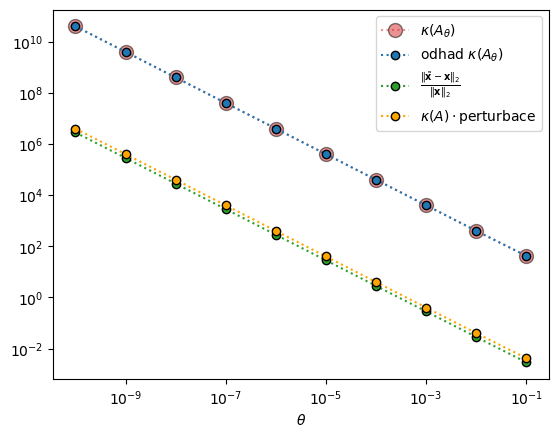

In [ ]:
theta_totry = np.logspace(-10,-1,10, dtype=np.float64)
VelikostPerturbace = 1e-4 # alpha=beta
b = np.array([1.,1.]); b_tilde = b + np.array([1.,-1.])*VelikostPerturbace

CislaPodminenosti = np.zeros(len(theta_totry)); AsymptOdhad_CislaPodm = np.zeros(len(theta_totry))
RelChyba_x = np.zeros(len(theta_totry)); OdhadPresnosti_x = np.zeros(len(theta_totry));

for ind in range(0,len(theta_totry)):
    A_theta = np.ones((2,2)) + theta_totry[ind] * np.outer( np.array([1,0]), np.array([1,0]) )
    A_eps = np.ones((2,2)) + (theta_totry[ind]-1) * np.outer( np.array([1,0]), np.array([1,0]) )
    x = np.linalg.solve(A_theta,b)
    x_pert = np.linalg.solve(A_theta,b_tilde)
    CislaPodminenosti[ind] = np.linalg.cond(A_theta)
    AsymptOdhad_CislaPodm[ind] = 2+4/theta_totry[ind]
    RelChyba_x[ind] = np.linalg.norm( x-x_pert ) / np.linalg.norm(x)
    OdhadPresnosti_x[ind] = CislaPodminenosti[ind] * VelikostPerturbace

############################## Vykreslovani
plt.loglog(theta_totry,CislaPodminenosti,'o:', color='tab:red', markeredgecolor='k', ms = 10, alpha = .5, label=r'$\kappa(A_{\theta})$')
plt.loglog(theta_totry,AsymptOdhad_CislaPodm,'o:', color='tab:blue', markeredgecolor='k', label=r'odhad $\kappa(A_{\theta})$')
plt.loglog(theta_totry,RelChyba_x,'o:', color='tab:green', markeredgecolor='k', label=r'$\frac{ \| \tilde{\mathbf{x}} - \mathbf{x} \|_2 }{\| \mathbf{x} \|_2}$')
plt.loglog(theta_totry,OdhadPresnosti_x,'o:', color='orange', markeredgecolor='k', label=r'$\kappa(A)\cdot \mathrm{perturbace}$')
plt.legend(); plt.xlabel(r'$\theta$'); plt.show()
############################## Vykreslovani

### Úloha A2 - případ $\varepsilon\approx 0$

Vezměme si $\varepsilon\approx 0, \varepsilon\geq 0$ a označíme a budeme řešit soustavu lineárních algebraických rovnic

$$ \underbrace{ \begin{bmatrix} \varepsilon & 1 \\ 1 & 1\end{bmatrix} }_{=: \, A_{\varepsilon}} \underbrace{\, \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \,}_{=: \, \mathbf{x}} = \underbrace{\, \begin{bmatrix} 1 \\ 2\end{bmatrix} \,}_{=: \, \mathbf{b}}.\qquad  (\star) $$

---
- **Tužka a papír**: Spočtěte $\kappa(A_{\varepsilon})$ a následně určete první dva členy Taylorova rozvoje $\kappa(A_{\varepsilon})$ pro $\varepsilon \approx 0$.
  - <details>
      <summary>Chci <font color="red"><b>hint 1</b></font></summary>
      Pro symmetrickou matici $M$ s číslem podmíněnosti $\kappa(M) := \|M\|_2\|M^{-1}\|_2$ platí
      $$\kappa(M) = \frac{|\lambda_{max}|}{|\lambda_{min}|}, $$
      kde $\lambda_{max}, \lambda_{min}$ jsou největší a nejmenší vlastní čísla $M$ v absolutní hodnotě, tj. $|\lambda_{max}| \geq |\lambda_{min}|$.
  </details>

  - <details>
      <summary>Chci <font color="red"><b>hint 2</b></font></summary>
      Při analogickém postupu k Úloze A1 by mělo stačit použít Taylorův rozvoj funkce $f(x) = \sqrt{x^2-2x+5}$, který je dán pro $x$ malé jako
      $$ \sqrt{x^2-2x+5} = \sqrt{5}\sqrt{1+\tfrac{x^2-2x}{5}} \approx \sqrt{5}\left( 1 + \frac{1}{2} \cdot \tfrac{x^2-2x}{5} + \mathcal{O}(x^{2}) \right) $$
  </details>

  - <details>
      <summary>Chci <font color="red"><b>hint 3</b></font></summary>
      Pokud mám rozvoj
      $$ f(x) = \gamma_0 + \gamma_1 x + \gamma_2 x^2 + \dotsc $$
      a chci najít rozvoj funkce $f(x)/(a_0 + a_1x + \dotsc + a_nx^n)$, tj. hledám koeficienty $\alpha_0,\alpha_1,\dotsc $ pro které
      $$f(x)/(a_0 + a_1x + \dotsc + a_nx^n) = \alpha_0 + \alpha_1x + \alpha_2x^2 + \dotsc, $$
      pak nutně musí platit
      $$\gamma_0 + \gamma_1 x + \gamma_2 x^2 + \dotsc = \left( \alpha_0 + \alpha_1x + \alpha_2x^2 + \dotsc \right) (a_0 + a_1x + \dotsc + a_nx^n). $$
      </details>

  - Bude pro $\varepsilon \rightarrow 0$ matice $A_{\varepsilon}$ dobře podmíněná?
  - Jak velká chyba řešení systému $(\star)$ je v principu nevyhnutlená při výpočtu na PC (řádově)?


- **Tužka a papír**: Použijte ***Gaussovu eliminaci bez pivotace*** pro systém $(\star)$ a zapište ji v maticové formě jako LU rozklad matice $A_{\varepsilon}$, tj. najděte dolní a horní trojúhelníkové matice $L_{\varepsilon}, U_{\varepsilon}$ takové, že $A_{\varepsilon} = L_{\varepsilon} U_{\varepsilon}$, viz [LU rozklad matice, skripta lingebry 1, konec Sekce 4.5](https://www.mff.cuni.cz/data/web/obsah/department_math/ka/skripta_la7.pdf). Následně formulujte Gaussovu eliminaci bez pivotace jako řešení dvou systémů s trojúhelníkovými maticemi.
    <details> <summary>Chci <font color="red"><b>hint</b></font></summary>       
    Předpokládejme, že jsme začali upravovat danou čtvercovou matici $A$ na řádkový odstupňovaný tvar. Dále předpokládejme, že jsme nepotkali žádný nulový pivot a proces skončil ve stavu
    $$  [ \, A \, | \, I \, ] = [ \, U \, | \, K \, ], \qquad (\circ) $$
    kde $I$ je jednotková matice, $U$ je horní trojúhelníková matice s nenulovými prvky na diagonále a $K$ je dolní trojúhelníková matice s jedničkami na diagonále. Z definice LU rozkladu si lze rozmyslet, že $A=LU$, kde $L=K^{-1}$, nebo-li Gaussova eliminace (coby proces transformace v $(\circ)$) odpovídá LU rozkladu matice.
    Ukažte, že platí
    $$K^{-1} = \begin{bmatrix} 1 & \\ \mathbf{k}_1 & \begin{matrix} 1 \\ \mathbf{k}_2 &  \begin{matrix} \ddots \\ & \begin{matrix} 1 \end{matrix} \end{matrix} \end{matrix} \end{bmatrix} = \begin{bmatrix} 1 & \\ -\mathbf{k}_1 & \begin{matrix} 1 \\ -\mathbf{k}_2 &  \begin{matrix} \ddots \\ & \begin{matrix} 1 \end{matrix} \end{matrix} \end{matrix} \end{bmatrix}, $$
    kde $\mathbf{k}_i$ je část $i$-tého sloupce pod diagonálou. Jinými slovy, výpočet $K^{-1}$ je triviální, odpovídá pouze změně znaménka u prvků v $K$ pod diagonálou.
    </details>

- Spočítejte řešení problému $(\star)$ dvěma způsopby :
  - **Kódění**: v počítači za pomoci rozkladu $A_{\varepsilon} = L_{\varepsilon} U_{\varepsilon}$ a předdělané funkce `TrojuhelnikovySolve()` -- řešení označíme $\tilde{\mathbf{x}}$.
  
  - **Tužka a papír**: za pomoci rozkladu $A_{\varepsilon} = L_{\varepsilon} U_{\varepsilon}$ -- řešení označíme $\mathbf{x}$.

- **Kódění**: Pro dané hodnoty $\varepsilon$ vykreslete
  - relativní chybu Gaussovy eliminace bez pivotace, tj. $\tfrac{\| \mathbf{x} - \tilde{\mathbf{x}}\|}{\|\mathbf{x} \|}$,
  - relativní reziduum Gaussovy eliminace bez pivotace, tj. $\tfrac{\| \mathbf{b} - A_{\varepsilon}\tilde{\mathbf{x}} \|}{\|\mathbf{b} \|}$,

- Co vypovídají výsledky o podmíněnosti problému $(\star)$ a o stabilitě Gaussovy eliminace bez pivotace?
---

---
***Řešení***

- charakteristický polynom $A_{\varepsilon}$ označíme $p_{char}(\lambda)$ a dostaneme
$$ p_{char}(\lambda) = (\varepsilon -\lambda)(1 -\lambda)-1 = \lambda^2 - (1+\varepsilon) \lambda + \varepsilon - 1, $$
s kořeny
$$\lambda_{max} = \frac{1+\varepsilon + \sqrt{\varepsilon^2 - 2\varepsilon +5}}{2}, \quad \lambda_{min} = \frac{1+\varepsilon - \sqrt{\varepsilon^2 - 2\varepsilon +5}}{2}.$$
Tudíž
$$\kappa (A_{\theta}) = \left| \frac{1+\varepsilon + \sqrt{\varepsilon^2 - 2\varepsilon +5}}{1+\varepsilon - \sqrt{\varepsilon^2 - 2\varepsilon +5}} \right| =
\frac{1+\varepsilon + \sqrt{\varepsilon^2 - 2\varepsilon +5}}{\sqrt{\varepsilon^2 - 2\varepsilon +5} - (1+\varepsilon)} =
\frac{ \left( 1+\varepsilon + \sqrt{\varepsilon^2 - 2\varepsilon +5}\right)^2}{4 - 4\varepsilon} = \\
= \dotsc = \frac{3+\sqrt{5}}{2} + \frac{3}{10}\left(5 + 3\sqrt{5} \right) \varepsilon + \mathcal{O}(\varepsilon^2)
$$


- LU rozklad snadno spočteme jako $$  \begin{bmatrix} \varepsilon & 1 \\ 1 & 1\end{bmatrix} =  \begin{bmatrix} 1 &  \\ \frac{1}{\varepsilon} & 1\end{bmatrix} \begin{bmatrix} \varepsilon & 1 \\  & 1-\frac{1}{\varepsilon} \end{bmatrix} $$
a tedy  dostaneme přesné řešení jako $\mathbf{x} = \left[  \frac{1}{1-\varepsilon} \, , \, 1-\frac{1}{ \frac{1}{\varepsilon} - 1} \right]^T$.

- **Komentář**: Ukázali jsme, že pro $\varepsilon \rightarrow 0$ se číslo podmíněnosti $\kappa(A_{\varepsilon}$ blíží k relativně malé konstantě, přibližně $(3+\sqrt{5})/2 \approx 2.62$ a tedy na základě přednášky očekáváme, že problém $(\star)$ je dobře podmíněný. Přesto vidíme, že při Gaussově eliminaci se při výpočtech pracuje s prvky řádu $1/\varepsilon$ v oboou faktorech matice $A_{\varepsilon}$, které pro klesající $\varepsilon$ rostou nade všechny meze. Tedy na základě přednášky (nebo definice výše) usuzujeme, že Gaussova eliminace v tomto případě není stabilní pro libovolné $\varepsilon$ (a tedy říkáme že není stabilní), protože pro malé $\varepsilon$ nelze výpočet Gaussovy eliminace na počítači interpretovat jako výpočet Gaussovy eliminace ve smyslu tužka-a-papír pro drobně perturbovaná data - problém je v konečnosti počítače a nutnosti práci s prvky řádu $1/\varepsilon$. Všimneme si, že toto je vlastnost našeho algoritmu - Gaussovy eliminace - nikoliv problému $(\star)$ jako takového.

---

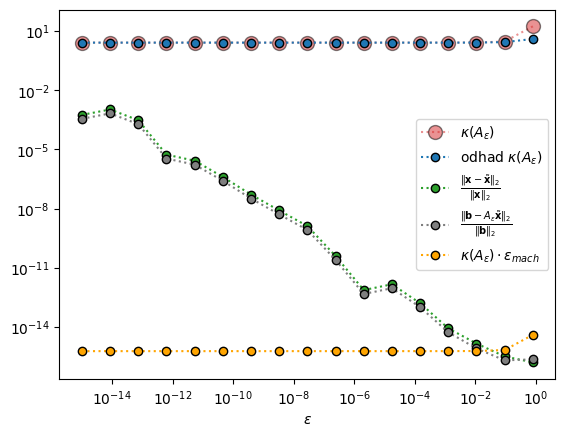

In [ ]:
def TrojuhlenikovySolve(A,b, HorniTrojuhelnik=True):
  ''' Vyresi system "Mx=b" velikosti 2-krat-2, kde "M" je bud horni trojuhelnikova matice (HorniTrojuhelnik=True) nebo dolni trojuhelnikova matice (HorniTrojuhelnik=False)'''
  x = np.zeros(len(b));
  if HorniTrojuhelnik:
    x[1] = b[1] / A[1,1]
    x[0] = (b[0] - A[0,1]*x[1]) / A[0,0]
  elif not HorniTrojuhelnik:
    x[0] = b[0] / A[0,0]
    x[1] = (b[1] - A[1,0]*x[0]) / A[1,1]
  return x

eps_totry = 10**( np.linspace(-15,-0.1,17, dtype=np.float64) )
b = np.array([1.,2.])

CislaPodminenosti = np.zeros(len(eps_totry)); AsymptOdhad_CislaPodm = np.zeros(len(eps_totry))
OdhadPresnosti_x = np.zeros(len(eps_totry));
RelChyba_x = np.zeros(len(eps_totry)); RelReziduum_x = np.zeros(len(eps_totry))

for ind in range(0,len(eps_totry)):
    A_eps = np.ones((2,2)) + (eps_totry[ind]-1) * np.outer( np.array([1,0]), np.array([1,0]) )
    x_exact = np.array([1/(1-eps_totry[ind]), 1-1/(1/eps_totry[ind]-1)])
    L_eps = np.array([[1,0],[1/eps_totry[ind],1]])
    U_eps = np.array([[eps_totry[ind],1],[0,1-1/eps_totry[ind]]])
    x_tilde = TrojuhlenikovySolve(U_eps, TrojuhlenikovySolve(L_eps,b, HorniTrojuhelnik=False) , HorniTrojuhelnik=True )
    CislaPodminenosti[ind] = np.linalg.cond(A_eps)
    AsymptOdhad_CislaPodm[ind] = (3+np.sqrt(5))/2 + (3/2+np.sqrt(5)/9)*eps_totry[ind]
    RelChyba_x[ind] = np.linalg.norm( x_exact-x_tilde ) / np.linalg.norm(x_exact)
    RelReziduum_x[ind] = np.linalg.norm( b-A_eps@x_tilde ) / np.linalg.norm(b)
    OdhadPresnosti_x[ind] = CislaPodminenosti[ind] * np.finfo(np.float64).eps

############################## Vykreslovani
plt.loglog(eps_totry,CislaPodminenosti,'o:', color='tab:red', markeredgecolor='k', ms = 10, alpha = .5, label=r'$\kappa(A_{\varepsilon})$')
plt.loglog(eps_totry,AsymptOdhad_CislaPodm,'o:', color='tab:blue', markeredgecolor='k', label=r'odhad $\kappa(A_{\varepsilon})$')
plt.loglog(eps_totry,RelChyba_x,'o:', color='tab:green', markeredgecolor='k', label=r'$\frac{ \| \mathbf{x} - \tilde{\mathbf{x}} \|_2 }{\| \mathbf{x} \|_2}$')
plt.loglog(eps_totry,RelReziduum_x,'o:', color='tab:gray', markeredgecolor='k', label=r'$\frac{ \| \mathbf{b} - A_{\varepsilon} \tilde{\mathbf{x}}  \|_2 }{\| \mathbf{b} \|_2}$')
plt.loglog(eps_totry,OdhadPresnosti_x,'o:', color='orange', markeredgecolor='k', label=r'$\kappa(A_{\varepsilon})\cdot \varepsilon_{mach}$')
plt.legend(); plt.xlabel(r'$\varepsilon$'); plt.show()
############################## Vykreslovani

### ZÚ - Wilkinson poprvé

Problém z Úlohy A2 lze vyřešit *částečnou pivotací* - prohozením prvního a druhého řádku (viz [lingebra skripta, Sekce 2.6.1, str. 62](https://www.mff.cuni.cz/data/web/obsah/department_math/ka/skripta_la7.pdf) a příklad [tady](https://web.mit.edu/10.001/Web/Course_Notes/GaussElimPivoting.html)). Maticově toto zapíšeme jako


$$ \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix} \begin{bmatrix} \varepsilon & 1 \\ 1 & 1\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix} \begin{bmatrix} 1 \\ 2\end{bmatrix},$$

nebo-li

$$  \begin{bmatrix} 1 & 1 \\ \varepsilon & 1\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 2 \\ 1\end{bmatrix},$$

kde pro $\varepsilon \approx 0$ už k numerickým problémům nedochází.
- <details>
  <summary>Pro připomenutí <font color="red"><b>Gaussovy eliminace s částečnou pivotací</b></font>.</summary>

    - Při Gaussově eliminaci se nám může (i pro regulární matici) stát, že v v určitém kroku potkáme nulový diagonální prvek (tzv. pivot). To je problém, protože bychom tímto prvkem rádi dělili a tím vynulovali všechny prvky pod diagonálou.

    - Ikdyž na té diagonále nemáme přímo nulu, ale pouze velmi malé číslo, toto zpravidla vyústí ve ztrátu přesnosti - přesně jak jsme viděli v úloze A2.

    - Částečná pivotace odpovídá tomu, že v každém kroku Gaussovy eliminace prohodíme zbývající řádky tak, aby diagonální prvek - pivot - byl ten s největší absolutní hodnotou (z těch prvků, které chci eliminovat), viz příklad výše.
</details>

Tento postup, tj. Gaussova eliminace s částečnou pivotací, je základem pro většinu nejběžněji používaných algoritmů pro řešení soustav lineárních algebraických rovnic $A\mathbf{x} = \mathbf{b}$ (a funkce jako [np.linalg.solve()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) nebo [sp.linalg.lu()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) odpovídají konkrétním implementacím). Přirozenou otázkou tedy je, zda nám částečná pivotace už (zpětnou) stabilitu zaručí.

Místo matic 2-krát-2 si vezmeme tzv. Wilkinsonovy matice ("bohužel" [J.H Wilkinson](https://en.wikipedia.org/wiki/James_H._Wilkinson) byl neobyčejně nadaný a pečlivý matematik, takže jeho jméno nese hned několik typů matic - když budete googlit, tak tento není ten první co google nabídne)

$$
W_n =
\begin{bmatrix}
1  &    0   & \cdots &  0 & 1 \\
-1 & \ddots & \ddots & \vdots & \vdots \\
\vdots & \ddots & \ddots & 0  & \vdots \\
-1 & \cdots & -1 & 1  & 1 \\
-1 & \cdots & \cdots & -1 & 1
\end{bmatrix} \in \mathbb{R}^{n\times n}.
$$

---
**Tužka a papír**:
  - ukažte, že částečná pivotace neprohodí žádné řádky.
  - ukažte, že pro Gaussovu eliminaci s částečnou pivotací platí, že $|L_{ij}|\leq 1$ pro všechny prvky matice $L$, tj. $\forall i,j$.
  - odvoďte LU-faktorizaci $L_n U_n = W_n$ - nejprve pro $n=2,3,4$ a poté zobecněte pro libovolné $n\in \mathbb{N}$.
  - pro jaká $n$ už Gaussova eliminace s částečnou pivotací pro systém $W_n \mathbf{x} = \mathbf{b}$ *nemůže* spočítat přibližně správné řešení.

    <details><summary>Chci <font color="red"><b>hint</b></font></summary>
        Na přednášce jsme viděli Větu o stabilitě LU-rozkladu: Nechť matice $L$ a $U$ jsou výsledkem Gaussovy eliminace s částečnou pivotací pro matici $A$ řádu $n$ vypočítané programem se strojovou přesností $\varepsilon_{mach}$. Potom existuje matice $\Delta A$ taková, že $A+\Delta A = LU$ a zároveň platí $ ||| \Delta A ||| \leq 2n \varepsilon_{mach} |||L ||| \cdot |||U|||$, kde $|||\cdot|||$ odpovídá maximu z absolutní hodnoty prvků matice, tj. $|||M||| := max_{i,j} |M_{ij}|$. Pro jaké $n$ tato věta nemůže zaručit žádnou přesnost, tj. $ ||| \Delta A ||| \leq 1$?
        </details>

**Kódění**: Pro dané $n$ si definujeme $\mathbf{x} := [1/3,\dotsc ,1/3]^T \in \mathbb{R}^{n}$ a následně  $\mathbf{b} := W_n \mathbf{x}$. Pro libovolné $n$ máme tedy systém $W_n\mathbf{x} = \mathbf{b}$ pro který známe přesné řešení. Pro numerický výpočet v podobě Gaussovy eliminace s částečnou pivotací použijeme [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) (standardní implementace Gaussovy eliminace s částečnou pivotací).
  - pro dané hodnoty $n$ vykreslete obrázek analogický úloze A2, tj. vývoj relativní chyby a relativního rezidua v závislosti na $n$. Číslo podmíněnost $\kappa (W_n)$ můžeme spočítat pomocí funkce [`np.linalg.cond()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html).
  - zkuste stejný proces ale s přesným řešením $\mathbf{x} := [1,\dotsc ,1]^T$. Poté vyzkoušejte ještě pro $\mathbf{x} := [2,\dotsc ,2]^T, \mathbf{x} := [3,\dotsc ,3]^T$ a $\mathbf{x} := [0.3,\dotsc ,0.3]^T$. Vysvětlete rozdíly, které vidíte.
  - ukažte nám i ty obrázky co vám vyjdou pro alternativní $\mathbf{x}$ - můžete se naučit používat [`plt.subplots()`]() nebo můžete vytvořit nové google-colab buňky pro kód a jednoduše kopírovat kód co už máte.

----

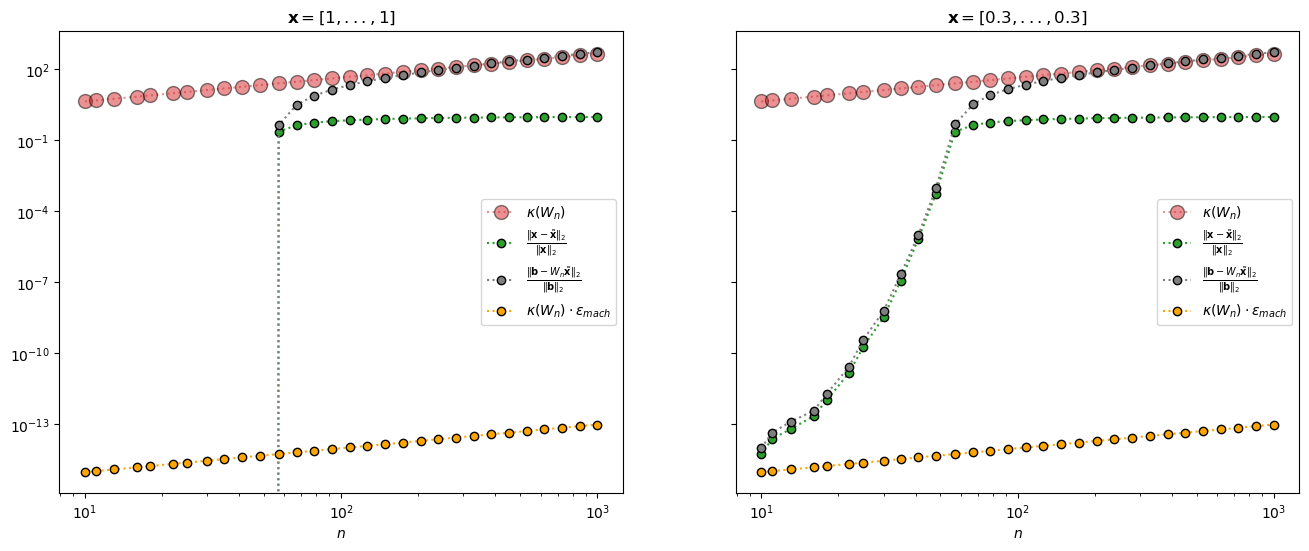

In [ ]:
def WilkinsonMatice(n):
  '''Pro integer "n" sestroji Wilkinsonovu matici "W_n" radu "n".'''
  W = np.diag(np.ones(n)); W[:,n-1] = np.ones(n)
  for k in range(1,n):
    W = W + np.diag(-np.ones(n-k),k=-k)
  return W


n_totry = np.logspace(1,3,30, dtype=np.int32)
RelChyba_x_1 = np.zeros(len(n_totry)); RelReziduum_x_1 = np.zeros(len(n_totry));
RelChyba_x_1div3 = np.zeros(len(n_totry)); RelReziduum_x_1div3 = np.zeros(len(n_totry));
CislaPodminenosti = np.zeros(len(n_totry)); OdhadPresnosti_x = np.zeros(len(n_totry))

for ind in range(0,len(n_totry)):
    W_n = WilkinsonMatice(n_totry[ind])
    CislaPodminenosti[ind] = np.linalg.cond(W_n)
    OdhadPresnosti_x[ind] = CislaPodminenosti[ind] * np.finfo(np.float64).eps

    x_1 = np.ones(n_totry[ind]);
    b_1 = W_n @ x_1;
    x_1_tilde = np.linalg.solve(W_n,b_1)
    RelChyba_x_1[ind] = np.linalg.norm( x_1-x_1_tilde ) / np.linalg.norm(x_1)
    RelReziduum_x_1[ind] = np.linalg.norm( b_1 - W_n @ x_1_tilde ) / np.linalg.norm(x_1)

    x_1div3 = 0.3 * np.ones(n_totry[ind]);
    b_1div3 = W_n @ x_1div3;
    x_1div3_tilde = np.linalg.solve(W_n,b_1div3)
    RelChyba_x_1div3[ind] = np.linalg.norm( x_1div3 - x_1div3_tilde ) / np.linalg.norm(x_1div3)
    RelReziduum_x_1div3[ind] = np.linalg.norm( b_1div3 - W_n @ x_1div3_tilde ) / np.linalg.norm(x_1div3)



############################## Vykreslovani
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(16,6))

ax1.loglog(n_totry,CislaPodminenosti,'o:', color='tab:red', markeredgecolor='k', ms = 10, alpha = .5, label=r'$\kappa(W_n)$')
ax1.loglog(n_totry,RelChyba_x_1,'o:', color='tab:green', markeredgecolor='k', label=r'$\frac{ \| \mathbf{x} - \tilde{\mathbf{x}} \|_2 }{\| \mathbf{x} \|_2}$')
ax1.loglog(n_totry,RelReziduum_x_1,'o:', color='tab:gray', markeredgecolor='k', label=r'$\frac{ \| \mathbf{b} - W_n \tilde{\mathbf{x}} \|_2 }{\| \mathbf{b} \|_2}$')
ax1.loglog(n_totry,OdhadPresnosti_x,'o:', color='orange', markeredgecolor='k', label=r'$\kappa(W_n)\cdot \varepsilon_{mach}$')
ax1.legend(); ax1.set_xlabel(r'$n$'); ax1.set_title(r'$\mathbf{x} = [1,...,1]$');

ax2.loglog(n_totry,CislaPodminenosti,'o:', color='tab:red', markeredgecolor='k', ms = 10, alpha = .5, label=r'$\kappa(W_n)$')
ax2.loglog(n_totry,RelChyba_x_1div3,'o:', color='tab:green', markeredgecolor='k', label=r'$\frac{ \| \mathbf{x} - \tilde{\mathbf{x}} \|_2 }{\| \mathbf{x} \|_2}$')
ax2.loglog(n_totry,RelReziduum_x_1div3,'o:', color='tab:gray', markeredgecolor='k', label=r'$\frac{ \| \mathbf{b} - W_n \tilde{\mathbf{x}} \|_2 }{\| \mathbf{b} \|_2}$')
ax2.loglog(n_totry,OdhadPresnosti_x,'o:', color='orange', markeredgecolor='k', label=r'$\kappa(W_n)\cdot \varepsilon_{mach}$')
ax2.legend(); ax2.set_xlabel(r'$n$'); ax2.set_title(r'$\mathbf{x} = [0.3,...,0.3]$');
plt.show()
############################## Vykreslovani

## Část B: Podmíněnost kořenů polynomu v monické bázi

Na mat-alýze uvidíte ve 4.semestru něco z teorie aproximace funkcí - konkrétně *polynomiální* a *trigonometrickou* aproximaci a ukážete si silné [věty typu](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem)
> "Pro dané $\varepsilon>0$ a spojitou funkci $f: (a,b) \rightarrow \mathbb{R}$ existuje polynom $p_n(x)$ t., že $\max\limits_{x\in (a,b)} |p_n(x) - f(x)| < \varepsilon$." $\qquad (\star)$

Později v semestru budeme řešit některé "problémy" právě skrze ideu aproximace kýžené funkce polynomem a řešení "problému" už pouze pro polynomy. Ale tento postup může být - při naivním postupu - velmi zrádný (to uvidíme napříř druhou částí semestru). My si demonstrujeme na problému hledání kořenů fakt, že ani kdybychom obecné "problémy" uměli převést na "problémy" s polynomy, nemáme zdaleka vyhráno (přestože z tvrzení $(\star)$ výše by se mohlo zdát, že ano).

Jak jsme viděli dříve, tak při numerickém výpočtu musíme počítat se zaokrouhlovacími chybami na úrovni $\varepsilon_{mach}\approx 10^{-16}$. Přirozená otázka tedy zní
>Pokud si uložím koeficienty polynomu $p(x)$ v počítači - a tedy je možná změním na úrovni $\varepsilon_{mach}\approx 10^{-16}$ - může mi to výrazně ovlivnit kořeny tohoto polynomu?"

### Ilustrace - Wilkinsonův polynom

Pro ilustraci budeme pracovat s tzv. [Wilkinsonovým polynomem](https://en.wikipedia.org/wiki/Wilkinson%27s_polynomial), tj. s $p_{\delta}(x)$ daným vzorečkem

$$
p_{\delta}(x) := \prod\limits_{i=1}^{20} (x-i)  - \delta x^{19} = \alpha_{20}x^{20} + (\alpha_{19}-\delta)x^{19} + \alpha_{18}x^{18} + \dotsc + \alpha_{0}.
$$

Vidíme, že pokud $\delta = 0$, pak $p_{0}(x)$ má krásné, jednoduché kořeny v celých číslech $1,2,\dotsc ,20$. Pokud budeme brát parametr $\delta\approx 0$, pak Wilkinsonův polynom $p_{\delta}$ odpovídá situaci, kdy jsme "koeficient u $x^{19}$ o $\delta$ změnili", například kvůli zaokrouhlování nebo jiné chybě v datech.

Pokud jde o naší předchozí otázku, zajímá nás tedy vliv $\delta$ na změnu kořenů $p_{\delta}$ oproti $p_{0}$. Jinými slovy chceme znát podmíněnost problému výpočtu kořenů polynomu, který je zadán koeficienty v monické bázi. Intuice mnoha matematiků byla, že tento problém je dobře podmíněný a tedy platí

> kořeny polynomů jsou "dobře" podmíněné v monomiální bázi $\quad \Rightarrow \quad $ pro $\delta \approx 0$ jsou kořeny polynomu $p_{\delta}$ "přibližně" $1,2,\dotsc ,20$.

V 80. letech Wilkinson demonstroval opak pomocí polynomu $p_{\delta}(x)$ výše - my se podíváme na grafické znázornění kořenů pro několik hodnot $\delta$.

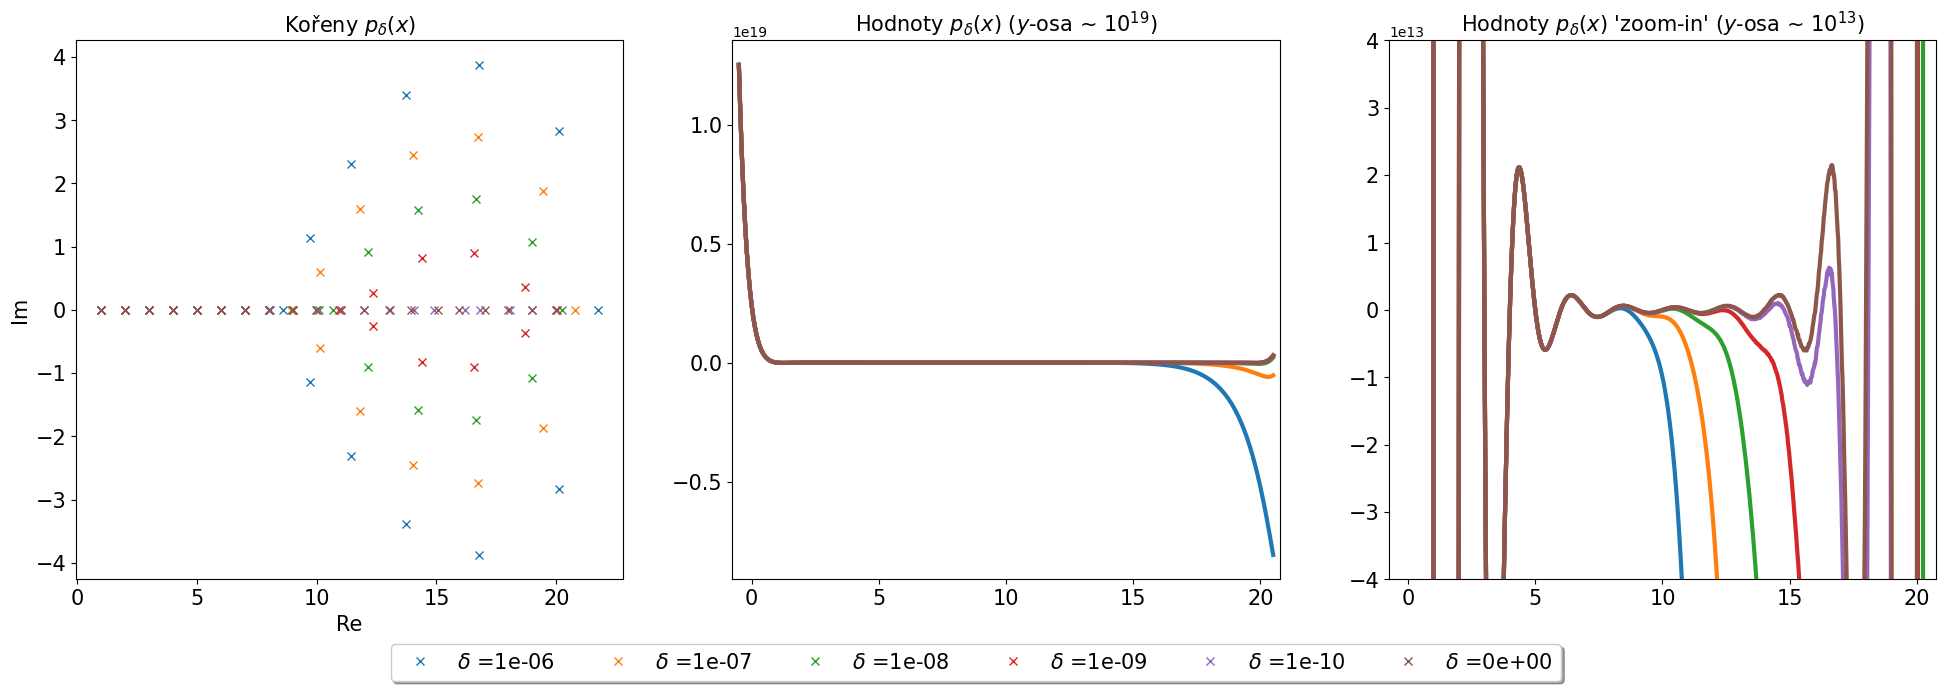

In [ ]:
fig = plt.figure(figsize=(24,7))

poly = [1.0]
for i in range(1, 21):
    poly = np.polymul(poly, [1.0, -i])
x_eval = np.linspace(-0.5, 20.5, 1000)

delta_totry = np.array([1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 0])
#delta_totry = np.array([2.**(-17), 2.**(-20), 2.**(-23), 2.**(-26), 2.**(-29), 0])
for delta_ind in range(0,len(delta_totry)):
    delta = delta_totry[delta_ind]
    polynew = copy(poly)
    polynew[1] -= delta
    roots = np.roots(polynew)

    ax = plt.subplot(1,3,1)
    plt.plot(roots.real, roots.imag, "x", label="$\delta$ =" +  f"{delta:.0e}")
    plt.xlabel("Re",fontsize=15); plt.ylabel("Im",fontsize=15)
    ax.yaxis.set_tick_params(labelsize=15); ax.xaxis.set_tick_params(labelsize=15)
    plt.title("Kořeny $p_{\delta}(x)$", fontsize=15)

    ax = plt.subplot(1,3,2)
    plt.plot(x_eval,np.polyval(polynew,x_eval), lw=3)
    plt.xlim(-0.75, 20.75);
    ax.yaxis.set_tick_params(labelsize=15); ax.xaxis.set_tick_params(labelsize=15)
    plt.title("Hodnoty $p_{\delta}(x)$ ($y$-osa ~ $10^{19}$)", fontsize=15)

    ax = plt.subplot(1,3,3)
    plt.plot(x_eval,np.polyval(polynew,x_eval), lw=3)
    plt.ylim(-4*1e+13,4*1e+13); plt.xlim(-0.75, 20.75);
    ax.yaxis.set_tick_params(labelsize=15); ax.xaxis.set_tick_params(labelsize=15)
    plt.title("Hodnoty $p_{\delta}(x)$ 'zoom-in' ($y$-osa ~ $10^{13}$)", fontsize=15)

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6, fontsize=15); plt.show()

Wilkinson tento jev dokázal (my si ho dokážeme níže také) a později o svém objevu napsal

>"Speaking for myself I regard it as the most traumatic experience in my career as a numerical analyst."

nebo-li

>"Pokud jde o mě, toto odvození představuje ten nejvíce traumatizující moment v mé kariéře numerického matematika."

### Úloha B1 - proč trauma?

V době kdy Wilkinson na tomto problému pracoval měl jeho počítač (a většina ostatních) přesnost $\varepsilon_{mach} = 2^{-30} \approx 9.31 \cdot 10^{-10} \approx 10^{-9}$.

---
**Tužka a papír**:
- Spočtěte koeficient $\alpha_{19}$ u $x^{19}$ polynomu $p_{0}(x)$.
- Na základě reprezentace čísel ve float-formátech (viz cviko 0 nebo [Slide 11, Přednáška 1](https://www.karlin.mff.cuni.cz/~blechta/znm/assets/uvodZNM.pdf)) a kódu níže určete s jakou zaorkouhlovací chybou musel Wilkinson počítat při reprezentaci $\alpha_{19}$ ve svém počítači (pro zjednodušení předpokládejme $\varepsilon_{mach} = 10^{-9}$).
- Spojte tento výsledek s obrázkem výše - která barvička odpovídá možné realitě výpočtu aproximace kořenů $p_{0}$ v podmínkách Wilkinsona?
---

### Úloha B2

Teď se podíváme na analýzu od Wilkinsona, která polynom $p_{\delta}(x)$ proslavila a posléze mu vynesla jeho jméno.

Nejprve si označíme pro libovolné $\delta$ kořeny $p_{\delta}(x)$ jako $x_1,\dotsc ,x_{20}$ - samozřejmě můžeme pro všechna $i$ psát $x_i = x_i(\delta)$. Zjevně tedy platí

$$
p_{\delta}(x) = \prod\limits_{i=1}^{20} (x-i)  + \delta x^{19} = \prod\limits_{i=1}^{20} (x-x_i),
$$

My bychom rádi kvantifikovali vliv $\delta$ na hodnotu $x_i$ pro $\delta \approx 0$ pro $\delta\approx 0$ ve smyslu definice podmíněnosti na začátku. Jinými slovy budeme brát kořeny $x_i$ jako funkce $\delta$ a chceme spočítat

$$
\frac{\mathrm{d}}{\mathrm{d} \delta} \left( x_i(\delta) \right) \quad \mathrm{v \; bodě \; } \delta = 0.
$$
Zafixujme si jeden kořen, tj. $i\in \{1,\dotsc,20\}$, a začneme počítat.

---
- **Tužka & papír** :
  - Odvoďte vztah
$$ \frac{\mathrm{d}}{\mathrm{d} \delta} \left( x_i(\delta) \right) =
 \frac{x_i^{19}(\delta)}{ \prod\limits_{k \neq i} (x_i(\delta)-x_k(\delta)) } $$
<details>
  <summary>Chci <font color="red"><b>hint</b></font></summary>
  Nejdřív z rovnosti
  $$
  \prod\limits_{i=1}^{20} (x-i)  + \delta x^{19} = \prod\limits_{i=1}^{20} (x-x_i(\delta)),
  $$
  odvoďte
  $$ \left[  \frac{\mathrm{d}}{\mathrm{d} \delta} \left( x-x_i(\delta) \right) \right] \cdot  \prod\limits_{k \neq i} (x-x_k(\delta)) +  \left( x-x_i(\delta) \right) \cdot \left[  \frac{\mathrm{d}}{\mathrm{d} \delta} \prod\limits_{k \neq i} (x-x_k(\delta)) \right]  = x^{19}$$
pro všechna $x$ a $\delta$.
</details>

  - Spočtěte
$$ \frac{\mathrm{d}}{\mathrm{d} \delta} \left( x_i(\delta) \right) \,\bigg|_{\delta=0}. $$

- **Kódění** : Numericky vyčíslete podmíněnost jednotlivých kořenů $x_1,\dotsc ,x_{20}$. Popište jak lze tyto výsledky interpretovat v rámci obrázku výše - čemu odpovídají?
---



In [ ]:
### Vycisleni podminenosti korenu (tj. [d/d delta] x_i(delta) v bode delta = 0 )

Podminenost korenu  1:  8.22e-18
Podminenost korenu  2:  8.19e-11
Podminenost korenu  3:  1.63e-06
Podminenost korenu  4:  2.19e-03
Podminenost korenu  5:  6.08e-01
Podminenost korenu  6:  5.82e+01
Podminenost korenu  7:  2.54e+03
Podminenost korenu  8:  5.97e+04
Podminenost korenu  9:  8.39e+05
Podminenost korenu 10:  7.59e+06
Podminenost korenu 11:  4.64e+07
Podminenost korenu 12:  1.99e+08
Podminenost korenu 13:  6.06e+08
Podminenost korenu 14:  1.33e+09
Podminenost korenu 15:  2.12e+09
Podminenost korenu 16:  2.41e+09
Podminenost korenu 17:  1.90e+09
Podminenost korenu 18:  9.96e+08
Podminenost korenu 19:  3.09e+08
Podminenost korenu 20:  4.31e+07


## [Kvíz](https://forms.gle/Y1SCp9NNdF3SzBia8)